In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
cd "E:\DIP proj\dataset"

E:\DIP proj\dataset


In [3]:
#TRAINING_DIR =('./train')
TRAINING_DIR =('./train')
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10,
                                                    target_size=(150, 150))
VALIDATION_DIR = ('./test')
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [5]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [6]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

c:\users\sharon\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
132/132 [==============================] - 136s 1000ms/step - loss: 0.6612 - acc: 0.6229 - val_loss: 0.3725 - val_acc: 0.8454
INFO:tensorflow:Assets written to: model2-001.model\assets
Epoch 2/5
132/132 [==============================] - 75s 569ms/step - loss: 0.3261 - acc: 0.8801 - val_loss: 0.1547 - val_acc: 0.9330
INFO:tensorflow:Assets written to: model2-002.model\assets
Epoch 3/5
132/132 [==============================] - 75s 566ms/step - loss: 0.2639 - acc: 0.8951 - val_loss: 0.0979 - val_acc: 0.9485
INFO:tensorflow:Assets written to: model2-003.model\assets
Epoch 4/5
132/132 [==============================] - 77s 586ms/step - loss: 0.2883 - acc: 0.8925 - val_loss: 0.1367 - val_acc: 0.9381
Epoch 5/5
132/132 [==============================] - 79s 600ms/step - loss: 0.1927 - acc: 0.9136 - val_loss: 0.0906 - val_acc: 0.9742
INFO:tensorflow:Assets written to: model2-005.model\assets


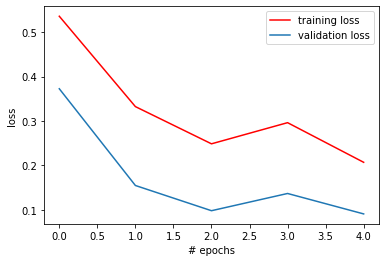

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [9]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model=load_model("./model2-002.model")

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4

#rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
eye_haarcascade = cv2.CascadeClassifier('haarcascade_eye.xml')
face_haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) 



In [16]:
#2
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model=load_model("./model2-002.model")

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

#rect_size = 4
#cap = cv2.VideoCapture(0) 


#haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



In [ ]:
#2
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        while True:
            ret, img = cap.read()
            img = cv2.flip(img,1,1) #im=cv2.flip(im,1,1) 
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
            eyes = eyeCascade.detectMultiScale(
            roi_gray,
            scaleFactor= 1.5,
            minNeighbors=10,
            minSize=(5, 5),
            )
        
    for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
               
            cv2.imshow('video', img)

            k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break

cap.release()
cv2.destroyAllWindows()

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()



In [ ]:
while True:
    (rval, im,) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    eye_haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    face_haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_haarcascade.detectMultiScale(rerect_size)
    eye = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    for e in eye:
        (ex,ey,ew,eh) = [v * rect_size for v in f]
        
        cv2.rectangle(im,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

    cv2.imshow('LIVE', im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
while True:
    (rval, im,) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    eye_haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    face_haarcascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = haarcascade.detectMultiScale(rerect_size)
    #eye = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        

        eyes = eye_haarcascade.detectMultiScale(rerect_size)
    for (ex,ey,ew,eh) in eyes:
        #(ex,ey,ew,eh) = [v * rect_size for v in f]
        
        cv2.rectangle(im,(ex,ey),(ex+ew,ey+eh),(255,255,255),2)

    cv2.imshow('LIVE', im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0) 

while True:
    ret, img= cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces  = face_haarcascade.detectMultiScale(gray)
    #faces = face_haarcascade.detectMultiScale(rerect_size)
    for (x,y,w,h) in faces:
        #(ex,ey,ew,eh) = [v * rect_size for v in f]
        
        cv2.rectangle(color_img,(x,y),(x+w,y+h),(255,0,0),2)
        face_gray = gray[y:y+h, x:x+w]
        #rerect_sized=cv2.resize(face_img,(150,150))
        #normalized=rerect_sized/255.0
        #reshaped=np.reshape(normalized,(1,150,150,3))
        #reshaped = np.vstack([reshaped])
        #result=model.predict(reshaped)
        face_color = img[y:y+h, x:x+w]

        
        #label=np.argmax(result,axis=1)[0]
      
        #cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        #cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        #cv2.putText(color_img, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    eyes = eye_haarcascade.detectMultiScale(gray_img)
    for (ex,ey,ew,eh) in eyes:
        #(ex,ey,ew,eh) = [v * rect_size for v in f]
        
        cv2.rectangle(face_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        cv2.imshow('img', img)
        key = cv2.waitKey(30) &0xff
    
        if key == 27: 
            break

cap.release()
cv2.destroyAllWindows()


In [13]:
# tryy

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')
 
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height

while True:
    ret, img = cap.read()
    img = cv2.flip(img,1,1) #im=cv2.flip(im,1,1) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,      
        minSize=(30, 30)
    )

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eyeCascade.detectMultiScale(
            roi_gray,
            scaleFactor= 1.5,
            minNeighbors=10,
            minSize=(5, 5),
            )
        
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
               
        cv2.imshow('video', img)

    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break

cap.release()
cv2.destroyAllWindows()

In [15]:
# tryy

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
 
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height

while True:
    ret, img = cap.read()
    img = cv2.flip(img,1,1) #im=cv2.flip(im,1,1) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    eyes = eyeCascade.detectMultiScale(
            roi_gray,
            scaleFactor= 1.5,
            minNeighbors=10,
            minSize=(5, 5),
            )
        
    for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
               
            cv2.imshow('video', img)

            k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break

cap.release()
cv2.destroyAllWindows()